# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np

# Load pickled train, validation and test datasets

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = validation['features'], validation['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

df_Xtrain = pd.Series(train)
ytrain = pd.Series(y_train)
df_Xvalidation = pd.Series(validation)
yvalidation = pd.Series(y_validation)
df_Xtest = pd.Series(test)

#df_Xvalidation = pd.read_pickle(validation_file)
#df_Xtest = pd.read_pickle(testing_file)

print("Columns in datasets: {}".format(df_Xtrain.keys()))
      
# TODO: Number of training examples
n_train = df_Xtrain['labels'].shape[0]

# TODO: Number of validation examples
n_validation = df_Xvalidation['labels'].shape[0]

# TODO: Number of testing examples.
n_test = df_Xtest['labels'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = list(df_Xtrain['features'][0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sorted(pd.unique(df_Xtrain['labels'])))

print("Number of training examples =", n_train)
print("Number of validation examples =",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Columns in datasets: Index(['coords', 'features', 'labels', 'sizes'], dtype='object')
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

count    34799.000000
mean        15.738297
std         12.002569
min          0.000000
25%          5.000000
50%         12.000000
75%         25.000000
max         42.000000
dtype: float64


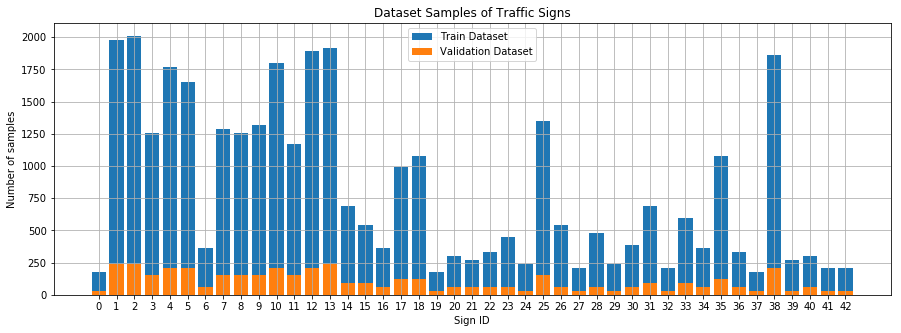

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline
signs = pd.read_csv('LabelDecoder/signnames.csv')

print(ytrain.describe())

plt.figure(figsize=(15,5))
plt.bar(ytrain.value_counts().index.values.tolist(),ytrain.value_counts().tolist(), label='Train Dataset')
#, tick_label=signs['ClassId'].tolist())
plt.bar(yvalidation.value_counts().index.values.tolist(),yvalidation.value_counts().tolist(), label='Validation Dataset')
#plt.hist(ytrain,bins=n_classes, align='mid')
#plt.hist(yvalidation,bins=n_classes, align='mid')
plt.title('Dataset Samples of Traffic Signs')
plt.ylabel('Number of samples')
plt.xlabel('Sign ID')
plt.grid(True)
plt.legend(loc='best')
plt.xticks(np.arange(0,n_classes,1));


Sign ID: 8
Sign Name: Speed limit (120km/h)


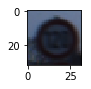

In [4]:
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print( "Sign ID: {}\nSign Name: {}".format(y_train[index],signs['SignName'][y_train[index]]))

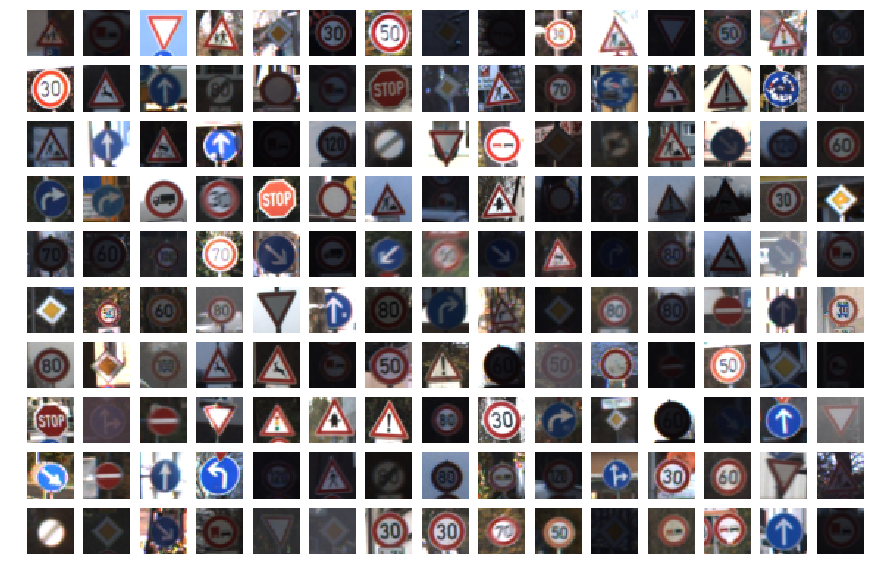

<class 'dict'>
dict_keys(['labels', 'coords', 'features', 'sizes'])
<class 'pandas.core.frame.DataFrame'>
Index(['labels', 'coords', 'features', 'sizes'], dtype='object')
Index(['coords', 'features', 'labels', 'sizes'], dtype='object')
180
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(32, 32, 3)


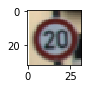

In [5]:
SAMPLES = 150
imgs = [X_train[random.randint(0, len(X_train))].squeeze() for i in range(SAMPLES) ]

grid1 = gridspec.GridSpec(10,15)
grid1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(15,10))
for i in range(SAMPLES):
    ax1 = plt.subplot(grid1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = imgs[i]
    #img = transform_image(image,20,10,5,brightness=1)

    plt.subplot(10,15,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


#df_Xtrain2 = pd.DataFrame(df_Xtrain)
df_Xtraindict = pd.read_pickle(training_file)
print(type(df_Xtraindict))
print(df_Xtraindict.keys())
#print(df_Xtraindict.items())

df_Xtrain2 = pd.DataFrame.from_dict(train,'index').transpose()
#print(df_Xtrain2.shape )
print(type(df_Xtrain2))
print(df_Xtrain2.keys())
#print(df_Xtrain2.head())


print(df_Xtrain.keys())
sXtrain = df_Xtrain.copy()

bool_arr = pd.Series( (df_Xtrain.loc['labels']==0) )# + (df_Xtrain.loc['labels']==24) )
print(bool_arr.sum())

#print(df_Xtrain.loc['labels'][bool_arr.values])
print(sXtrain.loc['labels'][bool_arr.values])

print(sXtrain.loc['features'][bool_arr.values][0].shape)
#print(sXtrain.loc['features'][bool_arr.values][419].shape)

image = sXtrain.loc['features'][bool_arr.values][0]

#print(image.shape) #32,32,3

plt.figure(figsize=(1,1))
plt.imshow(image);



 Transformed Image
(32, 32, 3) ()
(90, 32, 32, 3) (90,)


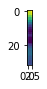

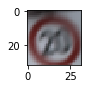

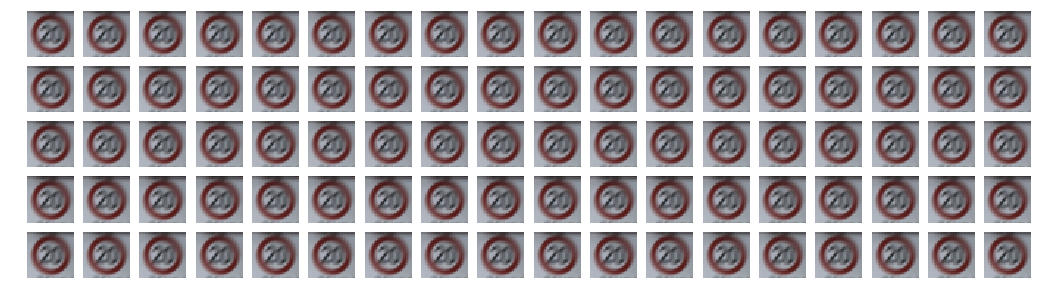

(34799, 32, 32, 3) (34799,)


In [6]:
print(" Transformed Image")

#####--------NOT MY CODE------

from skimage import transform, filters, exposure

PIXELS = 32
imageSize = PIXELS * PIXELS
num_features = imageSize

#def batch_iterator(data, y, batchsize, model):
def data_augmentation(data, labels, num_samples=1):
    '''
    Data augmentation batch iterator for feeding images into CNN.
    rotate all images in a given batch between -10 and 10 degrees
    random translations between -10 and 10 pixels in all directions.
    random zooms between 1 and 1.3.
    random shearing between -25 and 25 degrees.
    randomly applies sobel edge detector to 1/4th of the images in each batch.
    randomly inverts 1/2 of the images in each batch.
    '''
    X_batch_aug =[]
    Y_batch_aug =[]
    X_batch = data
    image_size=PIXELS
    
    for j in range(X_batch.shape[0]):
        for sample in range(num_samples):

            # random rotations betweein -10 and 10 degrees
            dorotate = random.randint(-30,30)

            # random translations
            trans_1 = random.randint(-3,3)#(-10,10)
            trans_2 = random.randint(-3,3)#(-10,10)

            # random zooms (1,1.3)
            zoom = random.uniform(0.5, 1.3)

            # shearing
            shear_deg = random.uniform(-15,15)#(-10,10)#(-25, 25)

            # set the transform parameters for skimage.transform.warp
            # have to shift to center and then shift back after transformation otherwise
            # rotations will make image go out of frame
            center_shift   = np.array((PIXELS, PIXELS)) / random.randint(1,3)*1.0 - 1 #0.5
            tform_center   = transform.SimilarityTransform(translation=-center_shift)
            tform_uncenter = transform.SimilarityTransform(translation=center_shift)

            tform_aug = transform.AffineTransform(rotation = np.deg2rad(dorotate),
                                                  scale =(1/zoom, 1/zoom),
                                                  shear = np.deg2rad(shear_deg),
                                                  translation = (trans_1, trans_2))

            tform = tform_center + tform_aug + tform_uncenter

            # Augmentation
            X_batch_aug.append(
                transform.warp(X_batch[j], tform, output_shape=(image_size, image_size), order = 1, mode = 'edge'))
            Y_batch_aug.append(labels[j])
    
    #After looping through the samples per image for augmentation, convert lists to numpy arrays
    X_batch_aug = np.array(X_batch_aug)
    Y_batch_aug = np.array(Y_batch_aug)
       
        # use sobel edge detector filter on one quarter of the images
        #indices_sobel = np.random.choice(X_batch_aug.shape[0],
        #                                 X_batch_aug.shape[0] // 4, replace = False)
        #for k in indices_sobel:
        #    img = X_batch_aug[k][0]
        #    X_batch_aug[k][0] = filters.sobel(img)

        # invert half of the images
        #indices_invert = np.random.choice(X_batch_aug.shape[0],
        #                                  X_batch_aug.shape[0] / 2, replace = False)
        #for l in indices_invert:
        #    img = X_batch_aug[l][0]
        #    X_batch_aug[l][0] = np.absolute(img - np.amax(img))


    return X_batch_aug, Y_batch_aug 
####---------NOT MY CODE-------


def show_aug(imaget, n_range=90):
    grid1 = gridspec.GridSpec(10,18)
    grid1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
    plt.figure(figsize=(18,10))
    for i in range(n_range):
        ax1 = plt.subplot(grid1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        img = imaget[i]
        #img = transform_image(image,20,10,5,brightness=1)

        plt.subplot(10,18,i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()


image = sXtrain.loc['features'][bool_arr.values][179] #[random.randint(0,160)]
img_label = sXtrain.loc['labels'][bool_arr.values][179]
print(image.shape, img_label.shape)
imaget,labelt = data_augmentation(np.array([image]),np.array([img_label]), 90)
print(imaget.shape , labelt.shape)
plt.figure(figsize=(1,1))
plt.imshow(image[0]);
plt.figure(figsize=(1,1))
plt.imshow(imaget[0]);

# ORIGINAL
grid1 = gridspec.GridSpec(10,18)
#grid1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(18,10))
for i in range(90):
    ax1 = plt.subplot(grid1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = image#[i]
    #img = transform_image(image,20,10,5,brightness=1)

    plt.subplot(10,18,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


# TRANSFORMED
#show_aug(imaget)
image = sXtrain.loc['features']#[bool_arr.values][179] #[random.randint(0,160)]
img_label = sXtrain.loc['labels']#[bool_arr.values][179]
imaget,labelt = data_augmentation(np.array(image), np.array(img_label), 1)
print(imaget.shape , labelt.shape)
#show_aug(imaget,imaget.shape[0])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def shuffle_data(x_data, y_data):
    """
    Shuffles the data from both sets using sklearn 'shuffle' function
        @x_data: samples of data to use as inputs
        @y_data: labels of the data 
    Returns:
        @x_shuffled: x_data shuffled
        @y_shuffled: y_data shuffled
        x_shuffled, y_shuffled
    """
    x_shuffled, y_shuffled = shuffle(x_data, y_data)
    return x_shuffled, y_shuffled

def normalize(data):
    """
    Normalize image data in the range of 0 to 1
        @data: Image dataset. the image shape is (32,32,3)
    Return:
        Numpy Array of normalized data
    """
    #norm_data = (np.array(data)-128)/128
    #norm_data = (np.array(data))/255
    
    
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
    
    #return norm_data


# maybe do a one-hot encoding here?
def data_augmentationTODO():
    """
    Augments the dataset
    """
    return None

### Model Architecture

Verify that you have _TensorFlow Version 1.x.x _

In [8]:
import tensorflow as tf
from distutils.version import LooseVersion
import warnings

if( LooseVersion(tf.__version__) < LooseVersion('1.0.0')):
    warnings.warn('\n\n WARNING!! Please use TensorFlow version 1.0.0 or newer. \
 This notebook was created using TF version 1.1.0 to take advantage of tf.layers')

print('Current TensorFlow Version: {}'.format(tf.__version__))

# STOP USER IF TF verison is < 1.0.0 REQUIRES tf.layers module
assert  LooseVersion(tf.__version__) >= LooseVersion('1.0.0'),  'Please use TensorFlow version 1.0.0 or newer\
 you need tf.layers module'

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Current TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def model_inputs(image_shape, num_classes):
    """
    Defines a Tensor for a batch of image input
        @image_shape: Shape of images, 1x3 tuple
        @num_classes: number of classes of labels
        @learning_rate: learn rate of the model
        @training: bool to define if the network is training (used in the batch normalization)
    Return:
        Placeholder tensors for cnn inputs, labels, learning rate and if the network is training
        @inputs,labels,learn_rate,training
    """
    batch_size=None
    inputs = tf.placeholder(tf.float32,(batch_size,image_shape[0],image_shape[1], image_shape[2]), name='input')
    labels = tf.placeholder(tf.int32,(batch_size),name='labels')
    #tf.placeholder(tf.int32,(batch_size,num_classes),name='labels')
    learn_rate = tf.placeholder(tf.float32,None,name='learning_rate')
    training = tf.placeholder(tf.bool,name='is_Training')
    keep_prob = tf.placeholder(tf.float32,None,name='keep_prob')
    
    return inputs, labels, learn_rate, training, keep_prob

def conv_layer(input2layer, filters, kernel, strides, padding='SAME', is_Training=False):
    """
    Creates a convolutional layer 
        @input2layer: Tensor that is the input to this layer
        @filters: number of filters in the convolution
        @kernel: int that defines the tuple of kernel size
        @strides: int that defines the tuple of strides
        @padding: type of padding: 'SAME' or 'VALID'
        @is_Training: bool, to identify if the conv layer is training(if in training\
        it uses Batch Normalization to calculate mean and stddev of current data. \
        Otherwise, it uses the dataset population mean and stddev)
    Return:
        @conv_layer_output: convolutional layer output
        
    """
    
    # First do a linear convolution to pass that to batch normalization
    linear = None
    conv_layer_linear = tf.layers.conv2d(input2layer, filters, kernel, strides, padding,activation=linear)
    
    # Batch Normalization step
    conv_layer_batchNorm = tf.layers.batch_normalization(conv_layer_linear, training=is_Training)
    
    # ReLU to add non linearity and be able to compute more complex functions
    conv_layer_output = tf.nn.relu(conv_layer_batchNorm)
    
    return conv_layer_output


def fully_connected(input2layer, num_units, activation_fn=None, is_Training=False):
    """
    Creates a fully connected layer 
        @input2layer: Tensor that is the input to this layer
        @num_units: int, Size of the layer (number of neurons)
        @is_Training: bool, to identify if the layer is training(if in training\
        it uses Batch Normalization to calculate mean and stddev of current data. \
        Otherwise, it uses the dataset population mean and stddev)
    Return:
        @layer_output: fully connected layer output
    """
    
    linear = None
    layer_linear = tf.layers.dense(input2layer, num_units, activation=linear)
    
    if activation_fn:
        #Apply batch normalization 
        layer_batchNorm = tf.layers.batch_normalization(layer_linear,training=is_Training)
    
        # Apply activation function after batch norm
        layer_output = activation_fn(layer_batchNorm)
        
    else:
        # Since no activation function was applied (mots likely) there is no benefit form batch norm
        layer_output = layer_linear
        
    return layer_output
    
def dropout_layer(layer, keep_prob):
    """
    Dropout layer 
    """
    drop = tf.nn.dropout(layer, keep_prob)
    return drop

### Base Model for CNN's

An abstract class is built in here to give the basic guidence for building CNN's using a common structure

In [23]:
# abc module helps design abstract classes
import abc

nBATCH_SIZE = 128
nLEARN_RATE = 0.001
nEPOCHS = 10
dKEEP_PROB = 0.5

class BaseCNN (metaclass=abc.ABCMeta):
    
    # maybe add here the virtual - model_inputs method or init the placeholders here
    #   as they will be inherited by child classes 
    def __init__():
        """NOTHING"""
        self.model_name = "BaseCNN"
        print("I am BaseCNN")
    
    @abc.abstractmethod
    def model(self, bShow_layer_sizes=False):
        """
        Model of the CNN network
        """
    
    @abc.abstractmethod
    def model_loss(self, logits):
        """
        Loss of the model
        """
    @abc.abstractmethod
    def model_opt(self, loss):
        """
        Optimizer and one step train result
        """
        
    @abc.abstractmethod
    def model_accuracy(self,logits):
        """
        Accuracy of the model
        """
    
    #@abc.abstractmethod
    def evaluate(self, input_data, labels):
        #print("Evaluate Base")
        #print("{} Input".format(self.inputs.get_shape()))
        num_samples = len(input_data)
        total_accuracy = 0
        session = tf.get_default_session()
        for offset in range(0,num_samples,nBATCH_SIZE):
            end = offset + nBATCH_SIZE
            batch_x, batch_y = input_data[offset:end], labels[offset:end]
            accuracy = session.run(self.accuracy, feed_dict={self.inputs: batch_x,
                                                             self.labels: batch_y,
                                                             self.learning_rate: nLEARN_RATE,
                                                             self.isTraining: False,
                                                             self.keep_prob:1.0})
            total_accuracy+= (accuracy*len(batch_x))
        return total_accuracy/num_samples
      
    #@abc.abstractmethod
    def train(self):
        ###############################
        training_file = 'traffic-signs-data/train.p'
        validation_file = 'traffic-signs-data/valid.p'
        testing_file = 'traffic-signs-data/test.p'

        with open(training_file, mode='rb') as f:
            train = pickle.load(f)
        with open(validation_file, mode='rb') as f:
            validation = pickle.load(f)
        with open(testing_file, mode='rb') as f:
            test = pickle.load(f)

        X_train, y_train = train['features'], train['labels']
        X_validation, y_validation = validation['features'], validation['labels']
        X_test, y_test = test['features'], test['labels']
        
        #X_train = normalize(X_train)
        #X_validation = normalize(X_validation)
        ###############################
        saver = tf.train.Saver()
        print("Train {}".format(self.model_name))
        init_vars = tf.global_variables_initializer()
        with tf.Session() as session:
            session.run(init_vars)
            print("Training Starting ...")
            num_samples = len(X_train)
            
            for epoch in range(nEPOCHS):
                X_train, y_train = shuffle_data(X_train, y_train)
                for offset in range(0,num_samples,nBATCH_SIZE):
                    end = offset + nBATCH_SIZE
                    inputs,labels = X_train[offset:end],y_train[offset:end]
                    imaget,labelt = data_augmentation(np.array(inputs), np.array(labels), 1)
                    inputs = np.concatenate([inputs,imaget])
                    labels = np.concatenate([labels,labelt])
                    session.run(self.train_step, feed_dict={self.inputs: inputs,
                                                            self.labels: labels,
                                                            self.learning_rate: nLEARN_RATE,
                                                            self.isTraining: True,
                                                            self.keep_prob:dKEEP_PROB})
                validation_accuracy = self.evaluate(X_validation, y_validation)
                print("Epoch: {}/{} ...  Validation Accuracy: {:.3f} ...".format(epoch+1,nEPOCHS,validation_accuracy))
            
            saver.save(session, self.model_name)
            print("{} saved".format(self.model_name))
        

### Building the LeNet Model

![LeNet Architecture](./Description_Images/lenet.png)
Source: Yan LeCun

In [24]:
def data_augm(img, train=False):
    if train:
        img = tf.image.random_contrast(img, lower=0.2, upper=1.8)
        return tf.image.random_brightness(img, max_delta= 32. / 255.)
    else:
        return img

class LeNet(BaseCNN):
        
    def __init__(self, img_shape, num_classes):
        tf.reset_default_graph()
        self.model_name = 'LeNet'
        self.num_classes = num_classes
        self.inputs, self.labels, self.learning_rate, self.isTraining,_ = model_inputs(img_shape, num_classes)
        self.one_hot_labels = tf.one_hot(self.labels,self.num_classes)
        
        self.logits = self.model(True)
        self.loss = self.model_loss(self.logits)
        self.train_step = self.model_opt(self.loss)
        self.accuracy = self.model_accuracy(self.logits)
        print("I am {}".format(self.model_name))
        

        
        
    def model(self, bShow_layer_sizes=False):
        """
        Builds the LeNet CNN model with Batch Normalization embbeded
        Return:
            @logits: the logits of the model
        """
        
        #Input
        if  bShow_layer_sizes:
            print("{} Input".format(self.inputs.get_shape()))
            print ("Outputs per layer")
        # Conv Layer 1
        # Input 32x32x3
        s = 1
        data_aug = tf.cond(self.isTraining,lambda: data_augm(self.inputs,True), lambda:data_augm(self.inputs))
        conv1 = conv_layer(data_aug, 6, 5, s, 'VALID', self.isTraining)
        if  bShow_layer_sizes:
            print("{} Conv Layer 1".format(conv1.get_shape()))
        # Out 28x28x6
    
        conv1 = tf.nn.max_pool(conv1, [1,3,3,1],[1,3,3,1],'SAME')
        if  bShow_layer_sizes:
            print("{} Max Pool 1".format(conv1.get_shape()))
        # Out 14x14x6

        # Conv Layer 2
        conv2 = conv_layer(conv1, 16, 3, s, 'VALID', self.isTraining)
        if  bShow_layer_sizes:
            print("{} Conv Layer 2".format(conv2.get_shape()))
        # Out 10x10x16
        
        conv2 = tf.nn.max_pool(conv2,[1,2,2,1],[1,2,2,1],'SAME')
        if  bShow_layer_sizes:
            print("{} Max Pool 2".format(conv2.get_shape()))
        # Out 5x5x16
        
        # Flatten
        flat = tf.contrib.layers.flatten(conv2)
        
        # Layer 3
        fc1 = fully_connected(flat, 120, tf.nn.relu, self.isTraining)
        if  bShow_layer_sizes:
            print("{} Dense Layer 1".format(fc1.get_shape()))

        # Layer 4
        fc2 = fully_connected(fc1, 84, tf.nn.relu, self.isTraining)
        if  bShow_layer_sizes:
            print("{} Dense Layer 2".format(fc2.get_shape()))

        # Layer 5 - Output
        logits = fully_connected(fc2, self.num_classes, None, self.isTraining)
        if  bShow_layer_sizes:
            print("{} Logits".format(logits.get_shape()))

        return logits

    def model_loss(self, logits):
        """
        Computes the loss of the model and convert the levels to one hot encoded
            @self: LeNet object
            @logits: logits calculated from the LeNet model
        Return:
            @loss: loss of the model
        """
        #one_hot_labels = tf.one_hot(self.labels, self.num_classes)
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=self.one_hot_labels, logits=logits)
        loss = tf.reduce_mean(cross_entropy)
        
        return loss
    
    def model_opt(self, loss):
        """
        Trains the model using the AdamOptimizer
            @loss: LeNet loss
        Return:
            @train_step: training optimizer result after one step minimizing a bit more based on loss 
        """
        with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
            optimizer = tf.train.AdamOptimizer(self.learning_rate)
            train_step = optimizer.minimize(loss)
        
        return train_step
    
    def model_accuracy(self,logits):
        """
        """
        correct_predictions = tf.equal(tf.argmax(logits,1),tf.argmax(self.one_hot_labels,1))
        accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))
        
        return accuracy


### Modified LeNet Implementation

In [25]:
class NewLeNet(BaseCNN):
        
    def __init__(self, img_shape, num_classes):
        tf.reset_default_graph()
        self.model_name = 'NewLeNet'
        self.num_classes = num_classes
        self.inputs, self.labels, self.learning_rate, self.isTraining,self.keep_prob = model_inputs(img_shape, num_classes)
        self.one_hot_labels = tf.one_hot(self.labels,self.num_classes)
        
        self.logits = self.model(True)
        self.loss = self.model_loss(self.logits)
        self.train_step = self.model_opt(self.loss)
        self.accuracy = self.model_accuracy(self.logits)
        print("I am {}".format(self.model_name))
        

    def model(self, bShow_layer_sizes=False):
        """
        Builds the LeNet CNN model with Batch Normalization embbeded
        Return:
            @logits: the logits of the model
        """
        
        #Input
        if  bShow_layer_sizes:
            print("{} Input".format(self.inputs.get_shape()))
            print ("Outputs per layer")
        # Conv Layer 1
        # Input 32x32x3
        s = 1
        #ORIGINAL#
        #conv1 = conv_layer(self.inputs, 6, 5, s, 'VALID', self.isTraining)
        
        #data_aug = tf.image.resize_nearest_neighbor(self.inputs,(32,32))
        #tf.image.rgb_to_grayscale(self.inputs)
        data_aug = tf.cond(self.isTraining,lambda: data_augm(self.inputs,True), lambda:data_augm(self.inputs))
        conv1 = conv_layer(data_aug, 16, 5, s, 'VALID', self.isTraining)
        #conv1 = conv_layer(tf.image.rgb_to_grayscale(self.inputs), 6, 9, s, 'VALID', self.isTraining)
        if  bShow_layer_sizes:
            print("{} Conv Layer 1".format(conv1.get_shape()))
        # Out 28x28x6
    
        conv1 = tf.nn.max_pool(conv1, [1,3,3,1],[1,3,3,1],'SAME')
        if  bShow_layer_sizes:
            print("{} Max Pool 1".format(conv1.get_shape()))
        # Out 14x14x6
        
        conv1 = dropout_layer(conv1, self.keep_prob)
        
        

        # Conv Layer 2
        conv2 = conv_layer(conv1, 32, 5, s, 'VALID', self.isTraining)
        #conv2 = conv_layer(conv1, 16, 3, s, 'VALID', self.isTraining)
        if  bShow_layer_sizes:
            print("{} Conv Layer 2".format(conv2.get_shape()))
        # Out 10x10x16
        
        conv2 = tf.nn.max_pool(conv2,[1,2,2,1],[1,2,2,1],'SAME')
        if  bShow_layer_sizes:
            print("{} Max Pool 2".format(conv2.get_shape()))
        # Out 5x5x16
        
        conv2 = dropout_layer(conv2, self.keep_prob)
        
        # Flatten
        #flat1 = tf.contrib.layers.flatten(conv1)
        #print(flat1.get_shape())
        #flat2 = tf.contrib.layers.flatten(conv2)
        #print(flat2.get_shape())
        #flat = tf.concat([flat1,flat2],0)
        #print(flat.get_shape())

        flat = tf.contrib.layers.flatten(conv2)
        
        # Layer 3
        fc1 = fully_connected(flat, 1200, tf.nn.relu, self.isTraining)
        if  bShow_layer_sizes:
            print("{} Dense Layer 1".format(fc1.get_shape()))
        
        fc1 = dropout_layer(fc1, self.keep_prob)
        
        # Layer 4
        fc2 = fully_connected(fc1, 1140, tf.nn.relu, self.isTraining)
        if  bShow_layer_sizes:
            print("{} Dense Layer 2".format(fc2.get_shape()))
            
        fc2 = dropout_layer(fc2, self.keep_prob)

        # Layer 5 - Output
        logits = fully_connected(fc2, self.num_classes, None, self.isTraining)
        if  bShow_layer_sizes:
            print("{} Logits".format(logits.get_shape()))

        return logits

    def model_loss(self, logits):
        """
        Computes the loss of the model and convert the levels to one hot encoded
            @self: LeNet object
            @logits: logits calculated from the LeNet model
        Return:
            @loss: loss of the model
        """
        #one_hot_labels = tf.one_hot(self.labels, self.num_classes)
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=self.one_hot_labels, logits=logits)
        #cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=tf.concat([self.one_hot_labels,self.one_hot_labels],0),logits=logits)
        loss = tf.reduce_mean(cross_entropy)
        
        return loss
    
    def model_opt(self, loss):
        """
        Trains the model using the AdamOptimizer
            @loss: LeNet loss
        Return:
            @train_step: training optimizer result after one step minimizing a bit more based on loss 
        """
        with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
            optimizer = tf.train.AdamOptimizer(self.learning_rate)
            train_step = optimizer.minimize(loss)
        
        return train_step
    
    def model_accuracy(self,logits):
        """
        """
        correct_predictions = tf.equal(tf.argmax(logits,1),tf.argmax(self.one_hot_labels,1))
        #correct_predictions = tf.equal(tf.argmax(logits,1),tf.argmax(tf.concat([self.one_hot_labels,self.one_hot_labels],0),1))
        accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))
        
        return accuracy
    
    
    def evaluatel(self):
        print("Evaluate LeNet")
        
    def trainl(self):
        print("Train LeNet")
        

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [43]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import pickle

nBATCH_SIZE = 64 #128
nLEARN_RATE = 0.001
nEPOCHS = 40 #30 #40
dKEEP_PROB = 0.7 #0.85 #0.7

#l = LeNet(image_shape,n_classes)
#Train LeNet
#l.train()

#evaluate(l)
#l.evaluate([0],[0])
#train(l)
#super(LeNet,l).train()


#Train NewLeNet
n = NewLeNet(image_shape, n_classes)
n.train()

(?, 32, 32, 3) Input
Outputs per layer
(?, 28, 28, 16) Conv Layer 1
(?, 10, 10, 16) Max Pool 1
(?, 6, 6, 32) Conv Layer 2
(?, 3, 3, 32) Max Pool 2
(?, 1200) Dense Layer 1
(?, 1140) Dense Layer 2
(?, 43) Logits
I am NewLeNet
Train NewLeNet
Training Starting ...
Epoch: 1/40 ...  Validation Accuracy: 0.747 ...
Epoch: 2/40 ...  Validation Accuracy: 0.841 ...
Epoch: 3/40 ...  Validation Accuracy: 0.882 ...
Epoch: 4/40 ...  Validation Accuracy: 0.897 ...
Epoch: 5/40 ...  Validation Accuracy: 0.887 ...
Epoch: 6/40 ...  Validation Accuracy: 0.916 ...
Epoch: 7/40 ...  Validation Accuracy: 0.919 ...
Epoch: 8/40 ...  Validation Accuracy: 0.904 ...
Epoch: 9/40 ...  Validation Accuracy: 0.921 ...
Epoch: 10/40 ...  Validation Accuracy: 0.924 ...
Epoch: 11/40 ...  Validation Accuracy: 0.928 ...
Epoch: 12/40 ...  Validation Accuracy: 0.933 ...
Epoch: 13/40 ...  Validation Accuracy: 0.939 ...
Epoch: 14/40 ...  Validation Accuracy: 0.925 ...
Epoch: 15/40 ...  Validation Accuracy: 0.943 ...
Epoch: 16/40 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = n.evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./NewLeNet
Test Accuracy = 0.935


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="./Description_Images/visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")